In [1]:
import torch
import tensorflow as tf
import matplotlib.pyplot as plt

2025-06-20 14:43:06.206221: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750423386.219276   48594 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750423386.223368   48594 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750423386.233356   48594 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750423386.233372   48594 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750423386.233373   48594 computation_placer.cc:177] computation placer alr

In [2]:
from utils_nlp import scaled_dot_product_attention
from utils_display import nice_colorbar

In [3]:
sequence_length = 6
dimensionality_qk = 3
dimensionality_v = 4

q = torch.randn(sequence_length, dimensionality_qk)
k = torch.randn(sequence_length, dimensionality_qk)
v = torch.randn(sequence_length, dimensionality_v)

In [4]:
attention_weights, weighted_sum_of_values = scaled_dot_product_attention(q=q, k=k, v=v, mask=None)

I0000 00:00:1750423388.423261   48594 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2462 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5


In [9]:
tf.experimental.numpy.allclose(a=tf.math.reduce_sum(attention_weights, axis=1), b=1, rtol=1e-5, atol=1e-12, equal_nan=False)


<tf.Tensor: shape=(), dtype=bool, numpy=True>

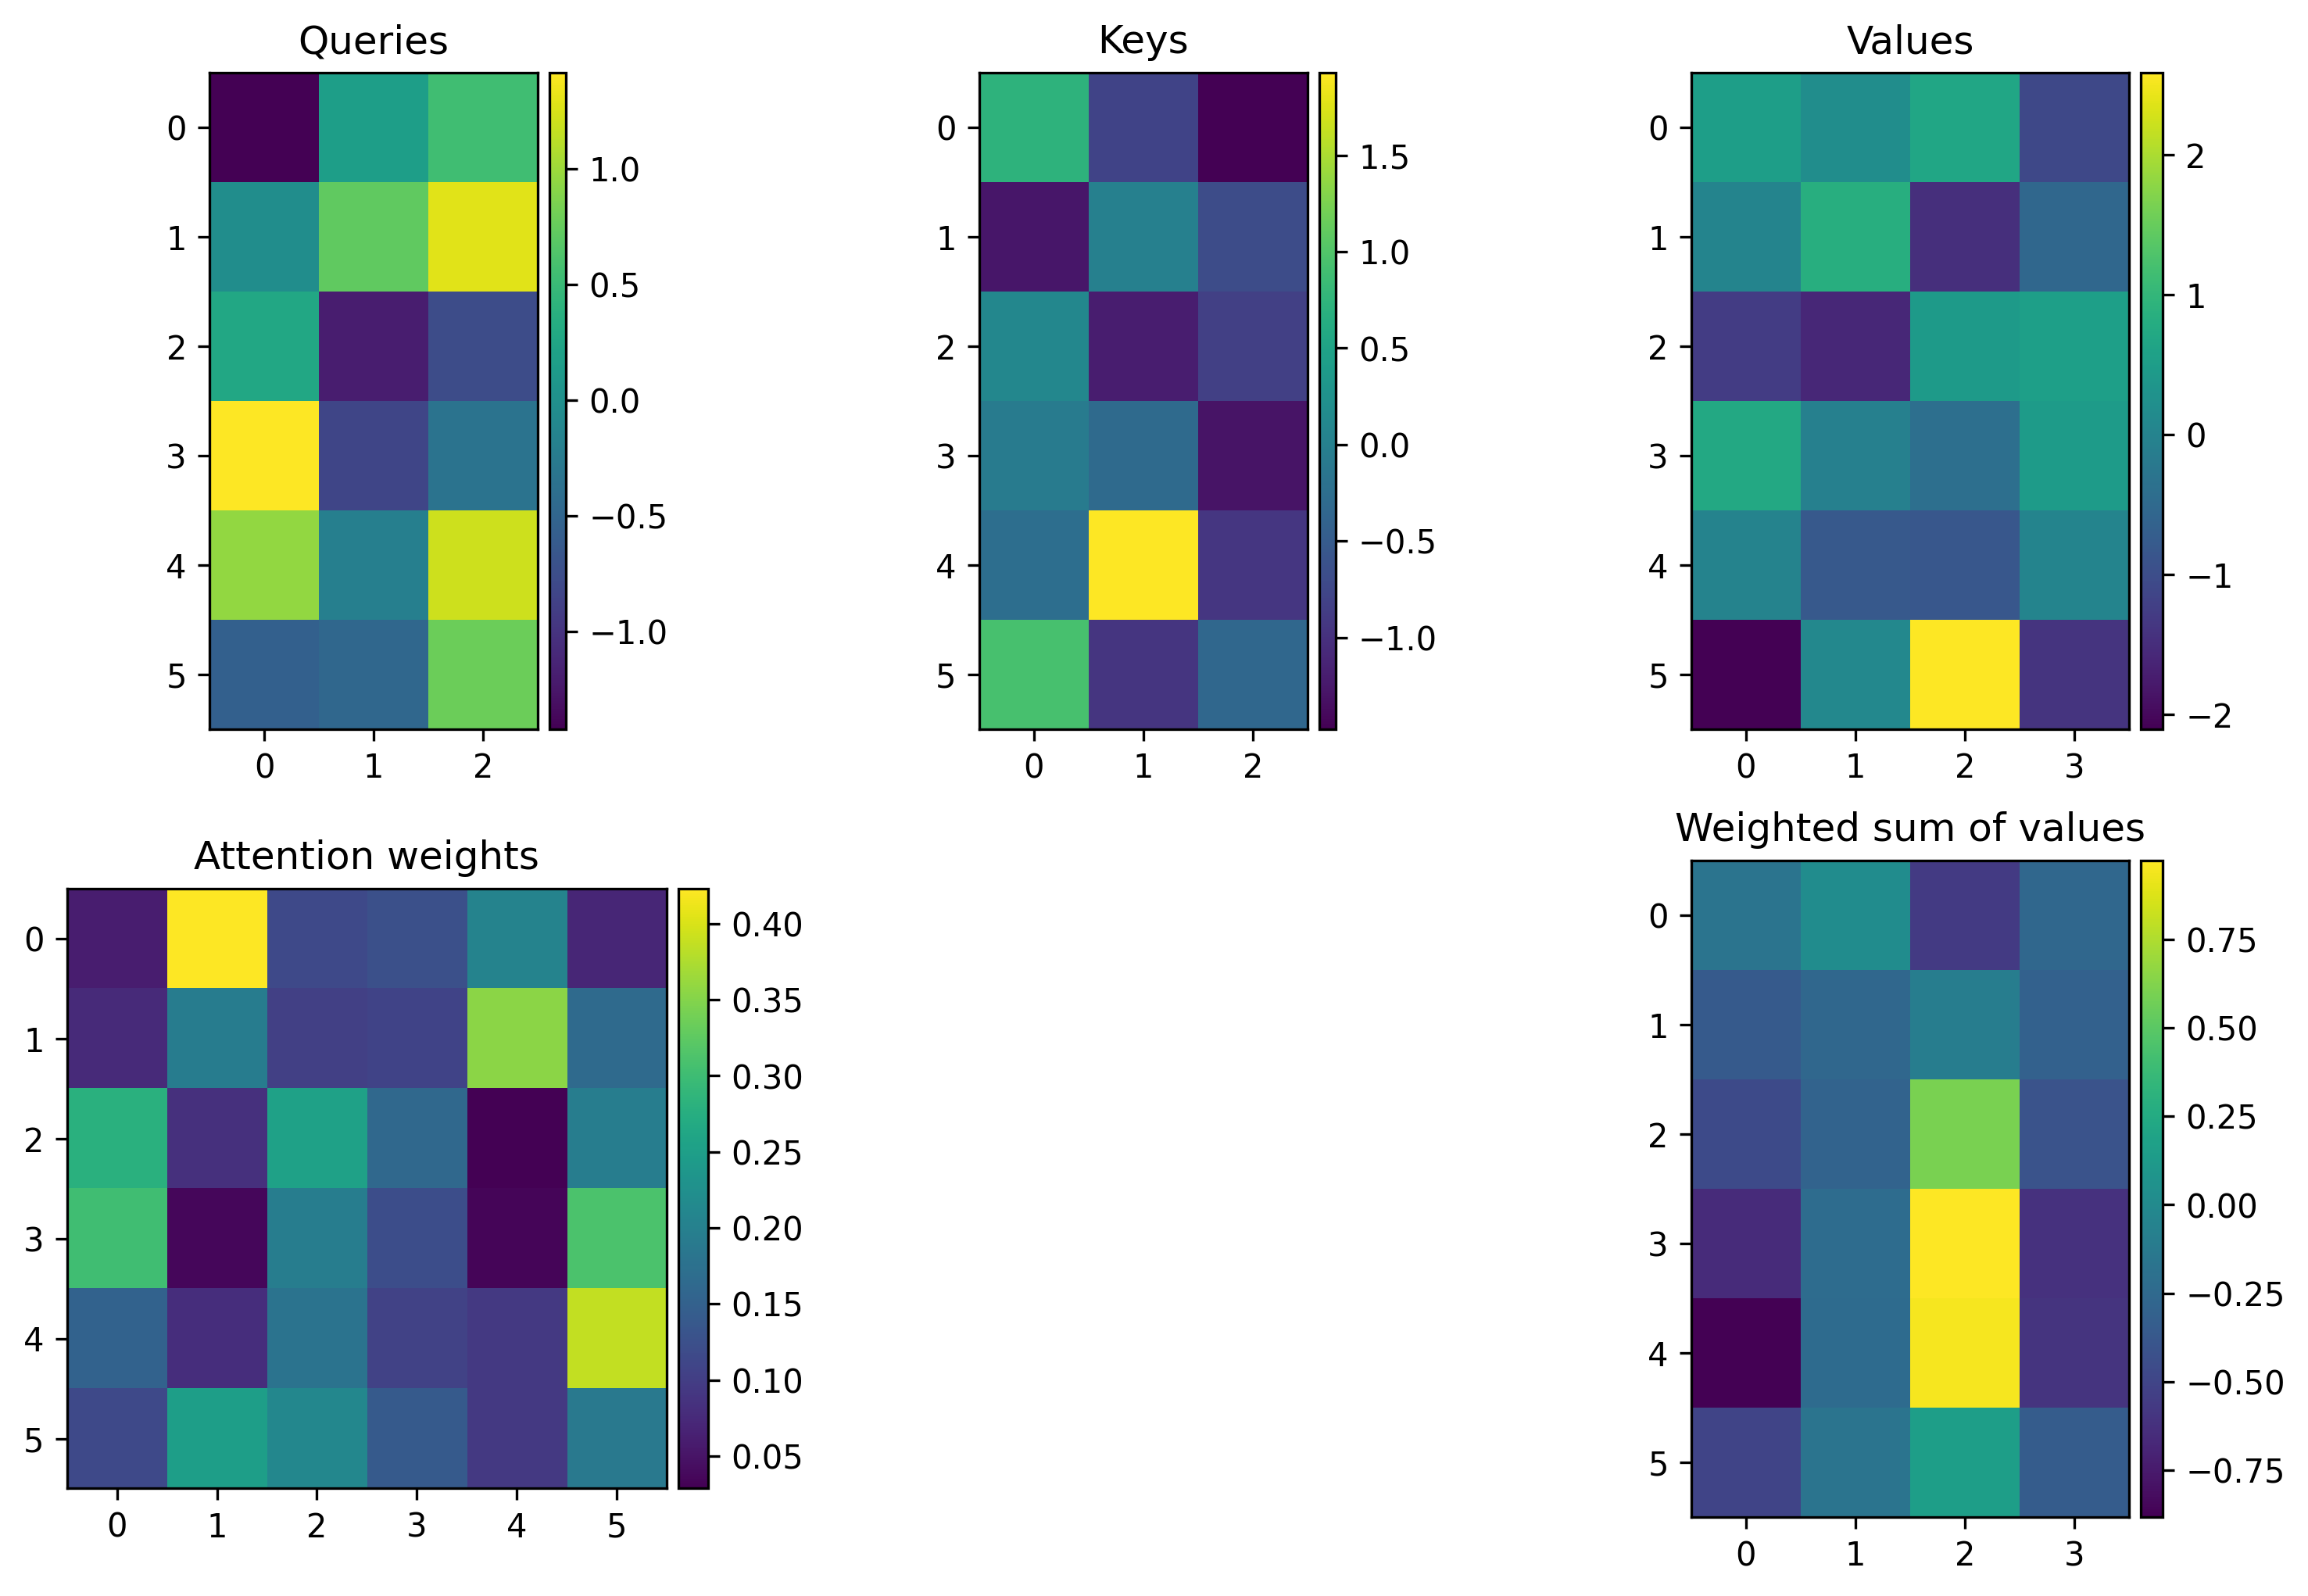

In [10]:
fig, ax = plt.subplots(2, 3)
fig.set_dpi(300)
fig.set_size_inches(12, 8, forward=True)

axx = ax[0, 0]
fig.sca(axx)
im = plt.imshow(q)
plt.title('Queries')
nice_colorbar(im, axx)

axx = ax[0, 1]
fig.sca(axx)
im = plt.imshow(k)
plt.title('Keys')
nice_colorbar(im, axx)

axx = ax[0, 2]
fig.sca(axx)
im = plt.imshow(v)
plt.title('Values')
nice_colorbar(im, axx)

axx = ax[1, 0]
fig.sca(axx)
im = plt.imshow(attention_weights)
plt.title('Attention weights')
nice_colorbar(im, axx)

axx = ax[1, 1]
axx.set_axis_off()

axx = ax[1, 2]
fig.sca(axx)
im = plt.imshow(weighted_sum_of_values)
plt.title('Weighted sum of values')
nice_colorbar(im, axx)

plt.show()